### In this notebook we study the lepton jet reconstruction in terms of the Lxy.

In [1]:
# python
import sys
import os
import importlib
from coffea import processor
# columnar analysis
from coffea.nanoevents import NanoEventsFactory
import awkward as ak   #numpy like module for handling arrays
#plotting
import matplotlib.pyplot as plt
import mplhep as hep
import numpy as np
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import ffschema, sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(ffschema)  #why do we need this?
importlib.reload(sidm_processor) 
importlib.reload(utilities)


<module 'sidm.tools.utilities' from '/home/cms-jovyan/SIDM/sidm/studies/../../sidm/tools/utilities.py'>

In [2]:
samples = [
    #"2Mu2E_100GeV_5GeV_40mm",
    #"2Mu2E_150GeV_5GeV_2p7mm",
    #"2Mu2E_200GeV_5GeV_2mm",
    #"2Mu2E_500GeV_5GeV_0p8mm",
    #"2Mu2E_800GeV_5GeV_0p5mm",
    #"2Mu2E_1000GeV_5GeV_0p4mm",
    #"2Mu2E_1000GeV_5GeV_0p04mm",
    #"2Mu2E_1000GeV_5GeV_20mm",
    #"2Mu2E_100GeV_1p2GeV_9p6mm",
    "2Mu2E_1000GeV_5GeV_40mm",
   # "2Mu2E_1000GeV_5GeV_4mm",
    
]
fileset = utilities.make_fileset(samples, "ffntuple_v4")

In [3]:
runner = processor.Runner(
    executor=processor.IterativeExecutor(),
    #executor=processor.FuturesExecutor(),
    schema=ffschema.FFSchema,
    #maxchunks=2,
    )

p = sidm_processor.SidmProcessor(
    [
        "baseNoLj",
        #"2mu2e",
        "baseNoLj_highPtA",
        
        
    ],
    ["gen_base"]
)

output = runner.run(fileset, treename="ffNtuplizer/ffNtuple", processor_instance=p)

Output()

Output()

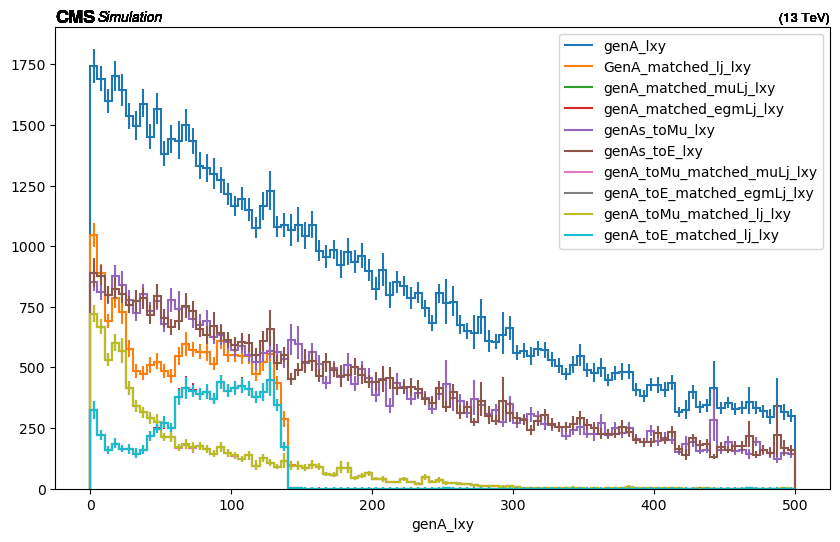

In [4]:
ch1 ="baseNoLj"
#ch2="2mu2e"
plt.figure(figsize=(10,6))
utilities.plot([output["out"][f"{name}"]["hists"]["genA_lxy"][ch1,:] for name in samples], density=False)
utilities.plot([output["out"][f"{name}"]["hists"]["genA_matched_lj_lxy"][ch1,:] for name in samples], density=False)
utilities.plot([output["out"][f"{name}"]["hists"]["genA_matched_muLj_lxy"][ch1,:] for name in samples], density=False)
utilities.plot([output["out"][f"{name}"]["hists"]["genA_matched_egmLj_lxy"][ch1,:] for name in samples], density=False)
utilities.plot([output["out"][f"{name}"]["hists"]["genAs_toMu_lxy"][ch1,:] for name in samples], density=False)
utilities.plot([output["out"][f"{name}"]["hists"]["genAs_toE_lxy"][ch1,:] for name in samples], density=False)
utilities.plot([output["out"][f"{name}"]["hists"]["genA_toMu_matched_muLj_lxy"][ch1,:] for name in samples], density=False)
utilities.plot([output["out"][f"{name}"]["hists"]["genA_toE_matched_egmLj_lxy"][ch1,:] for name in samples], density=False)
utilities.plot([output["out"][f"{name}"]["hists"]["genA_toMu_matched_lj_lxy"][ch1,:] for name in samples], density=False)
utilities.plot([output["out"][f"{name}"]["hists"]["genA_toE_matched_lj_lxy"][ch1,:] for name in samples], density=False)

plt.legend(["genA_lxy","GenA_matched_lj_lxy", "genA_matched_muLj_lxy", "genA_matched_egmLj_lxy",
            "genAs_toMu_lxy", "genAs_toE_lxy", "genA_toMu_matched_muLj_lxy", "genA_toE_matched_egmLj_lxy",
            "genA_toMu_matched_lj_lxy", "genA_toE_matched_lj_lxy"])

Text(0.5, 1.0, '2Mu2E_1000GeV_5GeV_40mm')

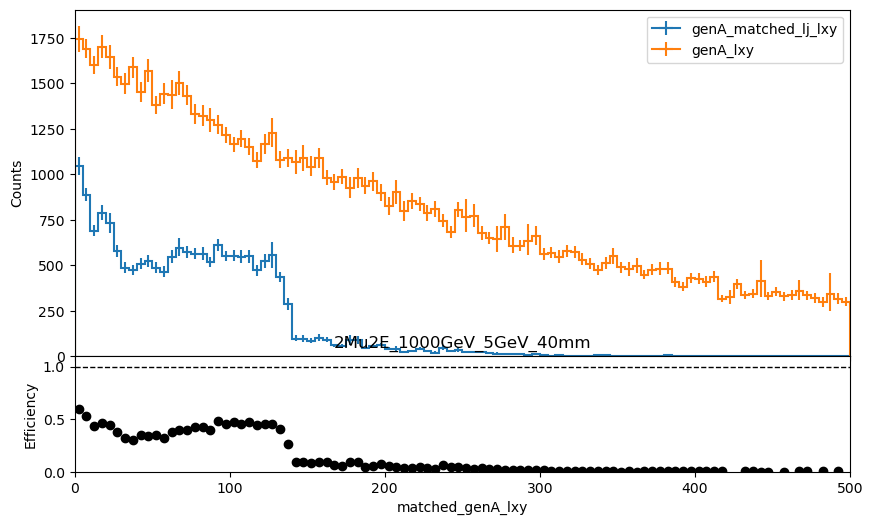

In [5]:
plt.figure(figsize=(10,6))
output["out"]["2Mu2E_1000GeV_5GeV_40mm"]["hists"]["genA_matched_lj_lxy"][ch1,:].plot_ratio(
       output["out"]["2Mu2E_1000GeV_5GeV_40mm"]["hists"]["genA_lxy"][ch1,:], 
       #rp_ylabel=r"Ratio",
       rp_num_label="genA_matched_lj_lxy",
       rp_denom_label="genA_lxy",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
plt.title("2Mu2E_1000GeV_5GeV_40mm")


Text(0.5, 1.0, '2Mu2E_1000GeV_5GeV_40mm')

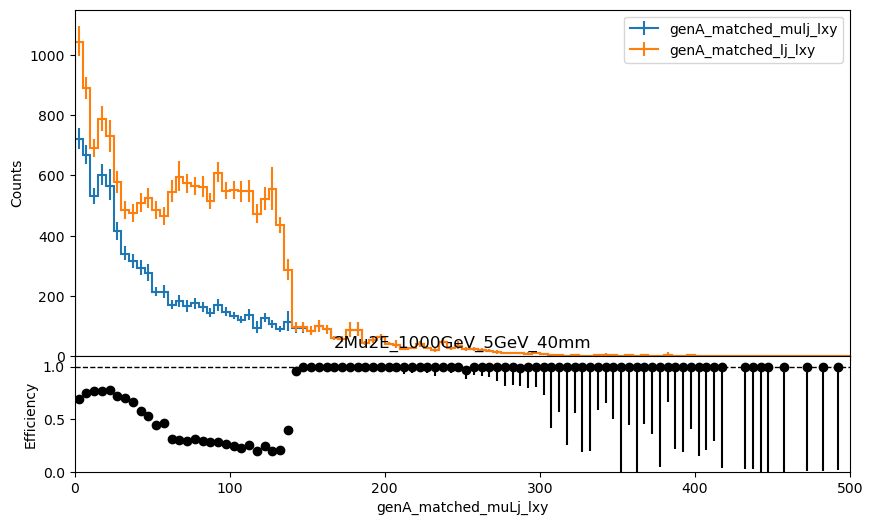

In [6]:
plt.figure(figsize=(10,6))
output["out"]["2Mu2E_1000GeV_5GeV_40mm"]["hists"]["genA_matched_muLj_lxy"][ch1,:].plot_ratio(
       output["out"]["2Mu2E_1000GeV_5GeV_40mm"]["hists"]["genA_matched_lj_lxy"][ch1,:], 
       rp_num_label="genA_matched_mulj_lxy",
       rp_denom_label="genA_matched_lj_lxy",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
plt.title("2Mu2E_1000GeV_5GeV_40mm")


Text(0.5, 1.0, '2Mu2E_1000GeV_5GeV_40mm')

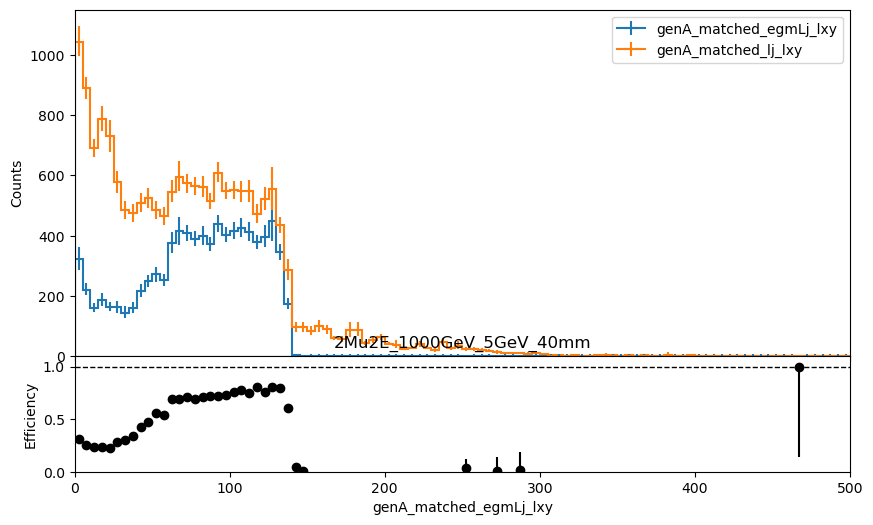

In [7]:
plt.figure(figsize=(10,6))
output["out"]["2Mu2E_1000GeV_5GeV_40mm"]["hists"]["genA_matched_egmLj_lxy"][ch1,:].plot_ratio(
       output["out"]["2Mu2E_1000GeV_5GeV_40mm"]["hists"]["genA_matched_lj_lxy"][ch1,:], 
       rp_num_label="genA_matched_egmLj_lxy",
       rp_denom_label="genA_matched_lj_lxy",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
plt.title("2Mu2E_1000GeV_5GeV_40mm")


Text(0.5, 1.0, '2Mu2E_1000GeV_5GeV_40mm')

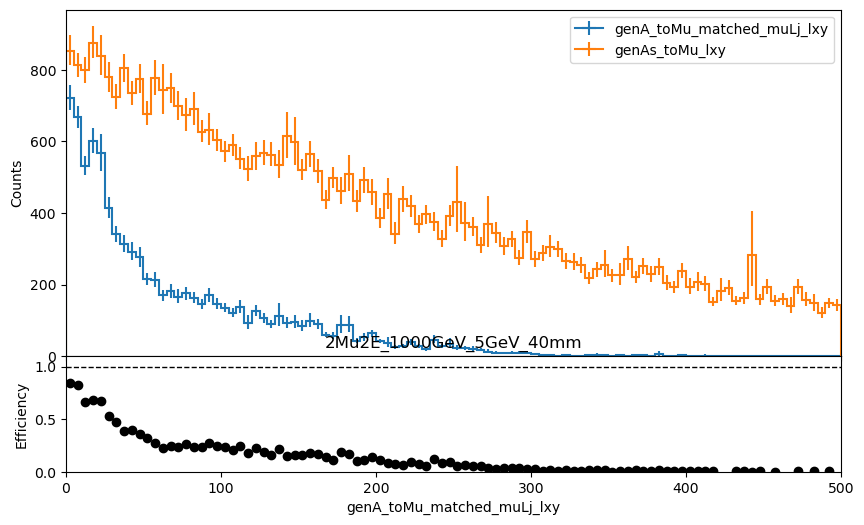

In [8]:
plt.figure(figsize=(10,6))
output["out"]["2Mu2E_1000GeV_5GeV_40mm"]["hists"]["genA_toMu_matched_muLj_lxy"][ch1,:].plot_ratio(
       output["out"]["2Mu2E_1000GeV_5GeV_40mm"]["hists"]["genAs_toMu_lxy"][ch1,:], 
       rp_num_label="genA_toMu_matched_muLj_lxy",
       rp_denom_label="genAs_toMu_lxy",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
plt.title("2Mu2E_1000GeV_5GeV_40mm")


Text(0.5, 1.0, '2Mu2E_1000GeV_5GeV_40mm')

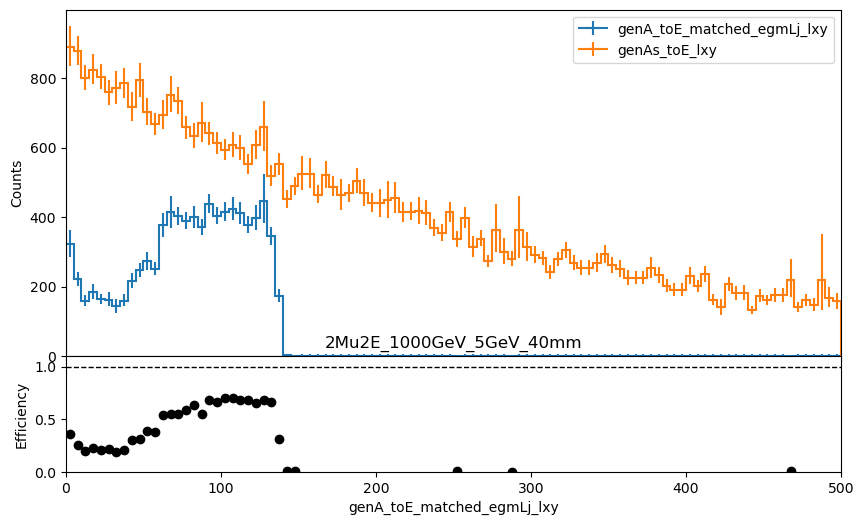

In [9]:
plt.figure(figsize=(10,6))
output["out"]["2Mu2E_1000GeV_5GeV_40mm"]["hists"]["genA_toE_matched_egmLj_lxy"][ch1,:].plot_ratio(
       output["out"]["2Mu2E_1000GeV_5GeV_40mm"]["hists"]["genAs_toE_lxy"][ch1,:], 
       rp_num_label="genA_toE_matched_egmLj_lxy",
       rp_denom_label="genAs_toE_lxy",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
plt.title("2Mu2E_1000GeV_5GeV_40mm")

Text(0.5, 1.0, '2Mu2E_1000GeV_5GeV_40mm')

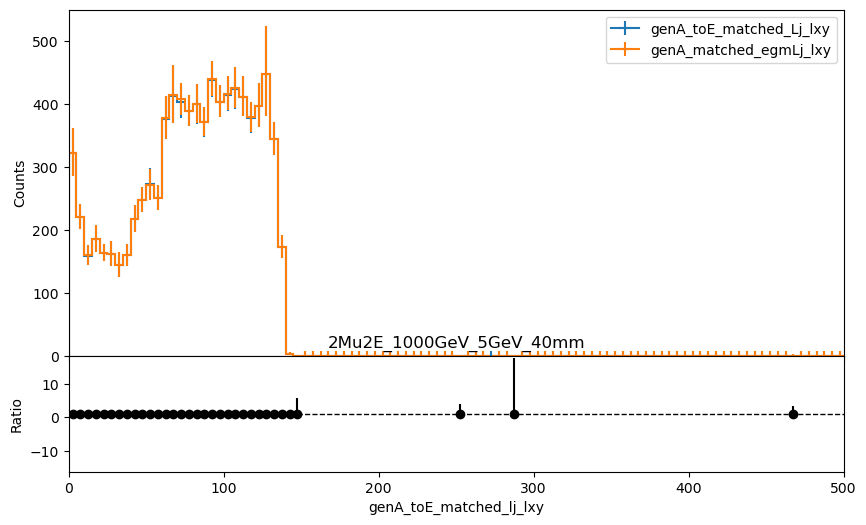

In [10]:
plt.figure(figsize=(10,6))
output["out"]["2Mu2E_1000GeV_5GeV_40mm"]["hists"]["genA_toE_matched_lj_lxy"][ch1,:].plot_ratio(
       output["out"]["2Mu2E_1000GeV_5GeV_40mm"]["hists"]["genA_matched_egmLj_lxy"][ch1,:], 
       rp_num_label="genA_toE_matched_Lj_lxy",
       rp_denom_label="genA_matched_egmLj_lxy",
       rp_uncert_draw_type="line",
       #rp_uncertainty_type="efficiency"
       )
plt.title("2Mu2E_1000GeV_5GeV_40mm")


In this notebook, we look at various categories of the dark photons and their Lxy distributions. If we look into the Lxy plot for the dark photons, we see that some of them overlap with each other, therfore we can safely ignore them in the future analysis. Therefore the ones I will be considering in the future would be ,
1) Dark Photon Lxy
2) Dark photon decaying to muon matching with muLj
3) Dark photom decaying to electronmatching with egmLj
4) Dark photon matching with lj

Among the efficiiency plot above the relevant plots are
1) dark photon matched lj /dark photon
2) dark photon decaying to muon matched with mulj / dark photon decaying to muon
3) dark photon decaying to electron matched with egmlj / dark photon decaying to electron

In [11]:
ch2 = "baseNoLj_highPtA"

Text(0.5, 1.0, '2Mu2E_1000GeV_5GeV_40mm')

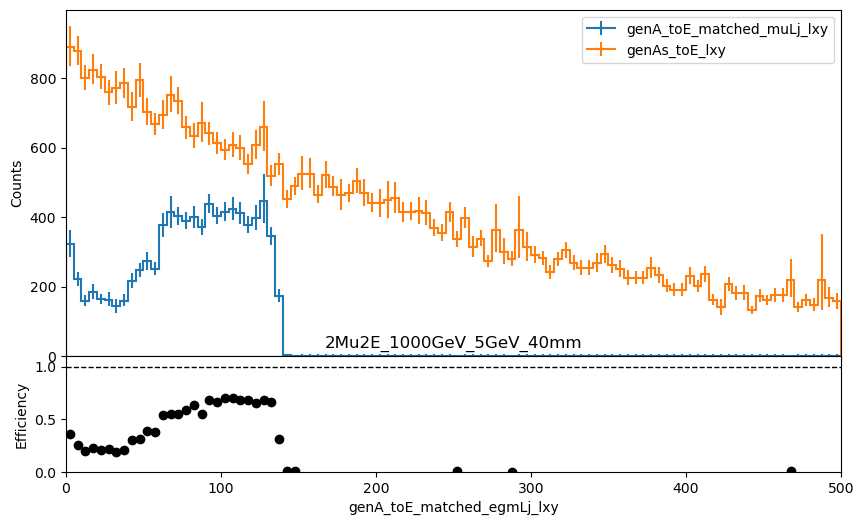

In [12]:
plt.figure(figsize=(10,6))
output["out"]["2Mu2E_1000GeV_5GeV_40mm"]["hists"]["genA_toE_matched_egmLj_lxy"][ch2,:].plot_ratio(
       output["out"]["2Mu2E_1000GeV_5GeV_40mm"]["hists"]["genAs_toE_lxy"][ch2,:], 
       rp_num_label="genA_toE_matched_muLj_lxy",
       rp_denom_label="genAs_toE_lxy",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
plt.title("2Mu2E_1000GeV_5GeV_40mm")

Text(0.5, 1.0, '2Mu2E_1000GeV_5GeV_40mm')

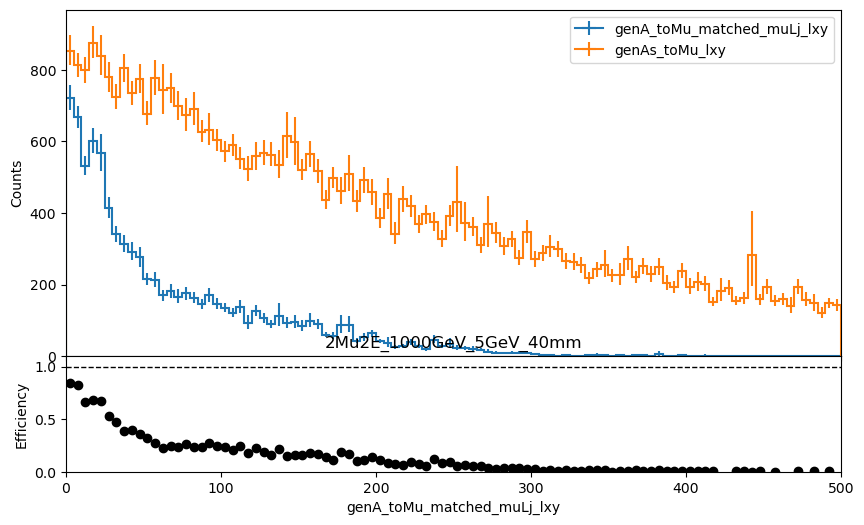

In [13]:
plt.figure(figsize=(10,6))
output["out"]["2Mu2E_1000GeV_5GeV_40mm"]["hists"]["genA_toMu_matched_muLj_lxy"][ch2,:].plot_ratio(
       output["out"]["2Mu2E_1000GeV_5GeV_40mm"]["hists"]["genAs_toMu_lxy"][ch2,:], 
       rp_num_label="genA_toMu_matched_muLj_lxy",
       rp_denom_label="genAs_toMu_lxy",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
plt.title("2Mu2E_1000GeV_5GeV_40mm")
